# Kmer Graph

In [1]:
DATE_TASK = "2022-03-06-ecoli-phapecoctavirus-core-genome"
DIR = mkpath("$(homedir())/workspace/$DATE_TASK")
cd(DIR)
DATE, TASK = match(r"^(\d{4}-\d{2}-\d{2})-(.*)$", DATE_TASK).captures

2-element Vector{Union{Nothing, SubString{String}}}:
 "2022-03-06"
 "ecoli-phapecoctavirus-core-genome"

In [26]:
import Pkg
Pkg.update()
pkgs = [
"JSON",
"HTTP",
"Dates",
"uCSV",
"DelimitedFiles",
"DataFrames",
"ProgressMeter",
"BioSequences",
"FASTX",
"Distances",
"StatsPlots",
"StatsBase",
"Statistics",
"MultivariateStats",
"Random",
"Primes",
"SparseArrays",
"SHA",
"GenomicAnnotations",
"Combinatorics",
"OrderedCollections",
"Downloads",
"Clustering",
"Revise",
"Mmap",
"Graphs",
"MetaGraphs",
"FileIO"
]

for pkg in pkgs
    try
        eval(Meta.parse("import $pkg"))
    catch
        Pkg.add(pkg)
        eval(Meta.parse("import $pkg"))
    end
end

# works but can't update locally, need to push and restart kernel to activate changes
# "https://github.com/cjprybol/Mycelia.git#master",
# didn't work
# "$(homedir())/git/Mycelia#master",
pkg_path = "$(homedir())/git/Mycelia"
try
    eval(Meta.parse("import $(basename(pkg_path))"))
catch
    # Pkg.add(url=pkg)
    Pkg.develop(path=pkg_path)
    # pkg = replace(basename(pkg), ".git#master" => "")
    # pkg = replace(basename(pkg), "#master" => "")
    eval(Meta.parse("import $(basename(pkg_path))"))
end

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/cjprybol/Mycelia.git#master`
  No Changes to `~/git/Mycelia/docs/Project.toml`
  No Changes to `~/git/Mycelia/docs/Manifest.toml`


In [23]:
function save_graph(graph::Graphs.AbstractGraph, outfile::String)
    if !occursin(r"\.jld2$", outfile)
        outfile *= ".jld2"
    end
    FileIO.save(outfile, Dict("graph" => graph))
    return outfile
end

function load_graph(file::String)
    return FileIO.load(file)["graph"]
end

load_graph (generic function with 1 method)

In [3]:
# https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?&id=$(tax_id)
# https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?lvl=0&amp;id=2733124
root_tax_id = 2733124

2733124

In [4]:
child_tax_ids = vcat(Mycelia.taxonomic_id_to_children(root_tax_id), root_tax_id)
# child_tax_ids = vcat(child_tax_ids, root_tax_id)

MATCH (n)<-[*]-(n2) WHERE n.tax_id IS NOT NULL AND n.tax_id = "2733124" RETURN DISTINCT n2.tax_id AS tax_id


25-element Vector{Int64}:
 1881104
 2734131
 1229753
 2734132
 2508195
 2734130
 1897495
 2734133
 2201417
 2738374
 2047918
 2144176
 2178929
 2695845
 2696455
 2696458
 2696383
 2696431
 2696432
 2697090
 2743961
 2761708
 2793345
 2900304
 2733124

In [5]:
# TODO
# here is where we should apply a filter where host == Escherichia
# need to load host information into neo4j taxonomy

In [6]:
# # refseq_metadata = Mycelia.load_refseq_metadata()
# ncbi_metadata = Mycelia.load_genbank_metadata()

In [7]:
# show(ncbi_metadata[1:1, :], allcols=true)

In [8]:
# tax_id_filter = map(taxid -> taxid in child_tax_ids, ncbi_metadata[!, "taxid"])
# is_right_host = map(x -> occursin(r"Escherichia"i, x), ncbi_metadata[!, "organism_name"])
# not_excluded = ncbi_metadata[!, "excluded_from_refseq"] .== ""
# is_full = ncbi_metadata[!, "genome_rep"] .== "Full"
# # assembly_levels = ["Complete Genome"]
# assembly_levels = ["Complete Genome", "Chromosome"]
# # assembly_levels = ["Complete Genome", "Chromosome", "Scaffold"]
# # assembly_levels = ["Complete Genome", "Chromosome", "Scaffold", "Contig"]
# assembly_level_filter = map(x -> x in assembly_levels, ncbi_metadata[!, "assembly_level"])
# full_filter = is_full .& not_excluded .& assembly_level_filter .& tax_id_filter .& is_right_host
# count(full_filter)

In [9]:
# TODO
# here is another place we could enforce host == escherichia
# we'll use a manual filter as a temporary solution

In [10]:
# ncbi_metadata_of_interest = ncbi_metadata[full_filter, :]

In [11]:
# https://www.ncbi.nlm.nih.gov/sviewer/viewer.cgi?db=nuccore&report=genbank&id=GCA_021354775

In [12]:
# for col in names(ncbi_metadata_of_interest)
#     @show col, ncbi_metadata_of_interest[1, col]
# end

In [13]:
# GCA_002956955.1

In [14]:
# # can I also get genbank record?????
# # for extension in ["genomic.fna.gz", "protein.faa.gz"]
# for extension in ["genomic.fna.gz", "protein.faa.gz", "genomic.gbff.gz"]
#     outdir = mkpath(joinpath(DIR, extension))
#     ProgressMeter.@showprogress for row in DataFrames.eachrow(ncbi_metadata_of_interest)
#         url = Mycelia.ncbi_ftp_path_to_url(row["ftp_path"], extension)
#         outfile = joinpath(outdir, basename(url))
#         if !isfile(outfile)
#             try
#                 Downloads.download(url, outfile)
#             catch e
#                 # @show e
#                 showerror(stdout, e)
#                 # @assert extension == "protein.faa.gz"
#                 # here is where we should call prodigal to fill in protein annotations if we don't otherwise see them
#             end
#         end
#     end
# end

In [15]:
extension = "genomic.fna.gz"
outdir = mkpath(joinpath(DIR, extension))

"/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/genomic.fna.gz"

In [16]:
fastx_files = filter(x -> !occursin(".ipynb_checkpoints", x), readdir(outdir, join=true))

14-element Vector{String}:
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/genomic.fna.gz/GCA_000906475.1_ViralProj185315_genomic.fna.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/genomic.fna.gz/GCA_002611945.1_ASM261194v1_genomic.fna.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/genomic.fna.gz/GCA_002612725.1_ASM261272v1_genomic.fna.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/genomic.fna.gz/GCA_004768905.1_ASM476890v1_genomic.fna.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/genomic.fna.gz/GCA_004794915.1_ASM479491v1_genomic.fna.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/genomic.fna.gz/GCA_005892245.1_ASM589224v1_genomic.fna.gz"
 "/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/genomic.fna.g

Progress:   0%|                                         |  ETA: 83.54 days

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 97], [0, 1, 9, 32], false)
  6.467934 seconds (9.49 M allocations: 536.955 MiB, 4.09% gc time, 99.96% compilation time)
(k, predicted_saturation) = 

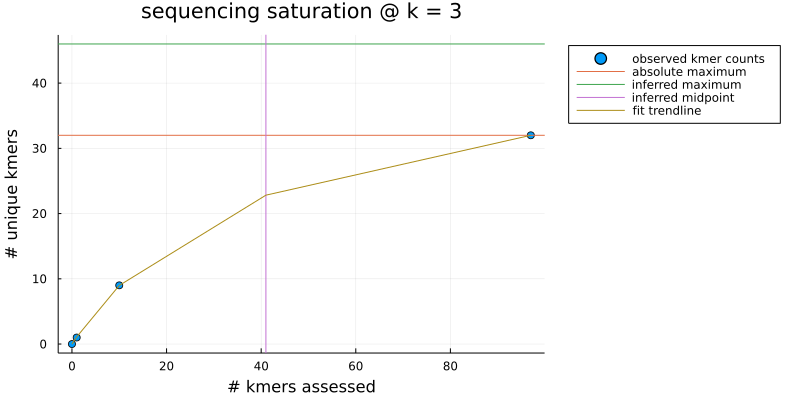

(3, 1.4375)


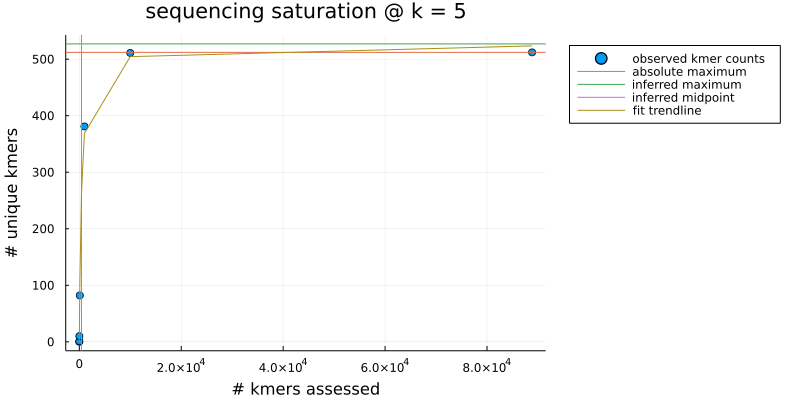

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 88847], [0, 1, 10, 82, 381, 511, 512], false)
  0.000137 seconds (268 allocations: 29.531 KiB)
(k, predicted_saturation) = (5, 1.029296875)


Progress:   9%|███▉                                     |  ETA: 0:00:10

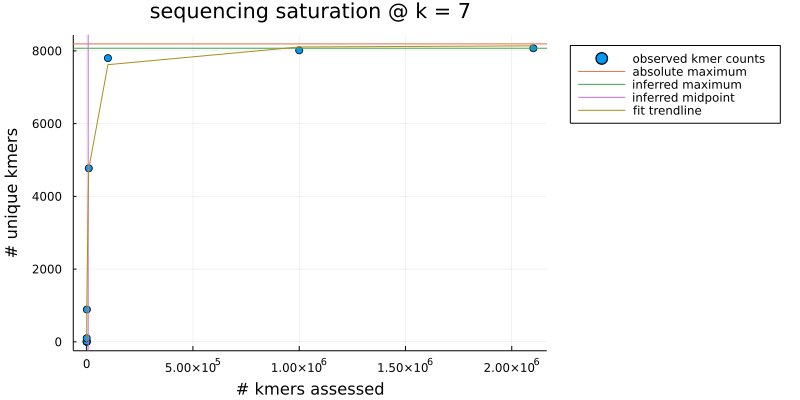

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 2101683], [0, 1, 10, 99, 888, 4771, 7801, 8014, 8072], true)
  0.000108 seconds (224 allocations: 26.609 KiB)
(k, predicted_saturation) = (7, 0.9853515625)


Progress:  19%|████████                                 |  ETA: 0:00:08

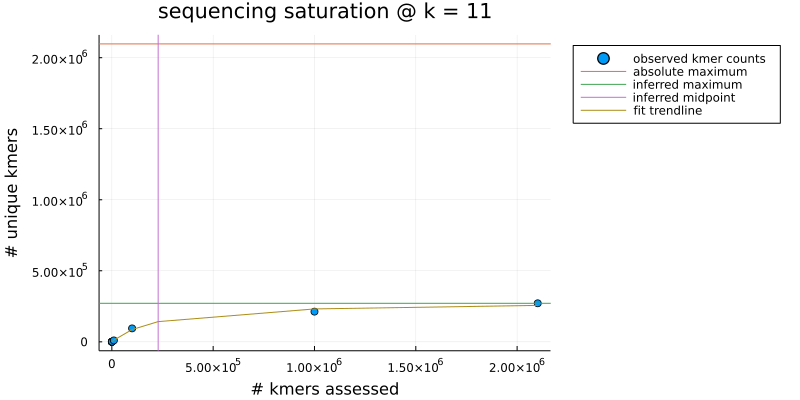

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 2101627], [0, 1, 10, 100, 995, 9843, 94450, 212429, 271085], true)
  0.000110 seconds (321 allocations: 38.109 KiB)
(k, predicted_saturation) = (11, 0.12926340103149414)


Progress:  20%|████████▏                                |  ETA: 0:00:08

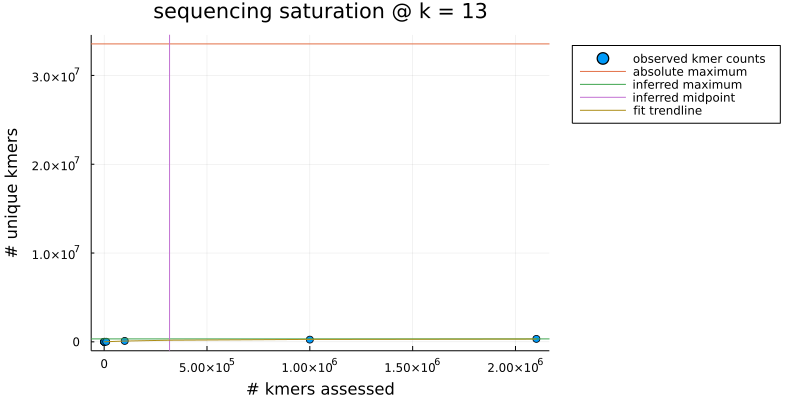

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 2101599], [0, 1, 10, 100, 999, 9936, 99438, 247021, 328687], true)
  0.000131 seconds (422 allocations: 50.516 KiB)
(k, predicted_saturation) = (13, 0.00979563593864441)
chosen k = 13


13

In [17]:
kmer_size = Mycelia.assess_kmer_saturation(fastx_files)

In [18]:
graph = Mycelia.fastx_to_kmer_graph(BioSequences.BigDNAMer{kmer_size}, fastx_files)

┌ Info: counting kmers
└ @ Mycelia /home/jupyter-cameron.prybol/.julia/packages/Mycelia/kFTQu/src/graph-construction.jl:103


  2.702955 seconds (846.01 k allocations: 408.624 MiB, 3.66% gc time, 19.67% compilation time)


┌ Info: initializing graph
└ @ Mycelia /home/jupyter-cameron.prybol/.julia/packages/Mycelia/kFTQu/src/graph-construction.jl:106
┌ Info: adding node metadata
└ @ Mycelia /home/jupyter-cameron.prybol/.julia/packages/Mycelia/kFTQu/src/graph-construction.jl:116
Progress: 100%|█████████████████████████████████████████| Time: 0:00:040:15
┌ Info: adding edges
└ @ Mycelia /home/jupyter-cameron.prybol/.julia/packages/Mycelia/kFTQu/src/graph-construction.jl:131
Progress: 100%|█████████████████████████████████████████| Time: 0:00:26


{328687, 340922} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [29]:
graph_outfile = "$DIR/root-tax-id_$(root_tax_id).k_$(kmer_size).genome-graph"

"/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/root-tax-id_2733124.k_13.genome-graph"

In [30]:
# Mycelia.save_graph(graph, graph_outfile)
save_graph(graph, graph_outfile * ".jld2")

"/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/root-tax-id_2733124.k_13.genome-graph.jld2"

In [31]:
Mycelia.graph_to_gfa(graph, graph_outfile * ".gfa")

"/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/root-tax-id_2733124.k_13.genome-graph.gfa"

In [ ]:
function graph_to_neo4j_tables(graph, base_directory)

In [32]:
base_directory = graph_outfile * ".neo4j-tables"

"/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/root-tax-id_2733124.k_13.genome-graph.neo4j-tables"

In [33]:
mkpath(base_directory)

"/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/root-tax-id_2733124.k_13.genome-graph.neo4j-tables"

In [34]:
node_table = joinpath(base_directory, "nodes.tsv")
edge_table = joinpath(base_directory, "edges.tsv")

"/home/jupyter-cameron.prybol/workspace/2022-03-06-ecoli-phapecoctavirus-core-genome/root-tax-id_2733124.k_13.genome-graph.neo4j-tables/edges.tsv"

In [ ]:
# write out node tsv

In [35]:
open(node_table, "w") do io
    println(io, join(["kmer", "count"], '\t'))
    for vertex in Graphs.vertices(graph)
        if haskey(graph.vprops[vertex], :kmer)
            sequence = graph.vprops[vertex][:kmer]
        else
            sequence = graph.vprops[vertex][:sequence]
        end
        depth = graph.vprops[vertex][:count]
        fields = ["$sequence", "$(depth)"]
        line = join(fields, '\t')
        println(io, line)
    end
end

In [ ]:
# write out edge tsv

In [37]:
open(edge_table, "w") do io
    println(io, join(["source", "source_orientation", "destination", "destination_orientation"], '\t'))
    for edge in Graphs.edges(graph)
        for o in graph.eprops[edge][:orientations]
            link = [edge.src,
                    o.source_orientation,
                    edge.dst,
                    o.destination_orientation]
            line = join(link, '\t')
            println(io, line)
        end
    end
end

In [38]:
NEO4J_BIN_DIR = "/home/jupyter-cjprybol/software/neo4j-community-4.4.3/bin"
if !occursin(NEO4J_BIN_DIR, ENV["PATH"])
    ENV["PATH"] = "$(NEO4J_BIN_DIR):" * ENV["PATH"]
end 
DOMAIN = "e9d58dd0.databases.neo4j.io"
USERNAME="neo4j"
PASSWORD=readline(joinpath(homedir(), ".config", "neo4j", "public-phapecoctavirus.password.txt"));
ADDRESS="neo4j+s://$(DOMAIN):7687"
DATABASE = "neo4j"

"neo4j"

In [19]:
cmd = "CREATE CONSTRAINT ON (k:Kmer) ASSERT k.sequence IS UNIQUE"
@time cypher(address = ADDRESS, username = USERNAME, password = PASSWORD, database = DATABASE, cmd = cmd)

  0.023436 seconds (229 allocations: 15.594 KiB, 98.37% compilation time)


Process(`cypher-shell --address neo4j://ncbi-taxonomy.cjp.garden:7687 --username neo4j --password tempo-athlete-news-info-fresh-4482 --database neo4j --format auto 'CREATE CONSTRAINT ON (t:Taxonomy) ASSERT t.tax_id IS UNIQUE'`, ProcessRunning)

An equivalent constraint already exists, 'Constraint( id=4, name='constraint_53f0c26a', type='UNIQUENESS', schema=(:Taxonomy {tax_id}), ownedIndex=3 )'.


```
gcloud iam service-accounts keys create ~/.config/gcloud/url-signer-key.json --iam-account="928365250020-compute@developer.gserviceaccount.com"
# gsutil -m signurl -d 24h -m GET "~/.config/gcloud/url-signer-key.json" "gs://neo4j-upload/public-phapecoctavirus/edges.tsv"
gsutil signurl -d 24h ~/.config/gcloud/url-signer-key.json gs://neo4j-upload/public-phapecoctavirus/nodes.tsv
gsutil signurl -d 24h ~/.config/gcloud/url-signer-key.json gs://neo4j-upload/public-phapecoctavirus/edges.tsv
```

In [67]:
# println(read(`gsutil signurl -d 24h '~/.config/gcloud/url-signer-key.json' 'gs://neo4j-upload/public-phapecoctavirus/nodes.tsv'`))

In [68]:
NODES_FILE = "https://storage.googleapis.com/neo4j-upload/public-phapecoctavirus/nodes.tsv?x-goog-signature=1af3780c722389bd6c32463e61759196ef2397d47a07ce0eab4cbc4f4d9fc08a9c977bc6084189fc0cb2367a33223510227274ce7d358f510c66d76583dd21d8e700e62798dc1ebe51114f59e50ef07d23db8c9662c848425dbe9edf97085cbc3c113c2b533bf87150712530c53a52276d6d04588b97456a3c8982dae75e2a72b84c5b10717b556ffe1f0dda275d33f43d295ee97381a89dccdd90b953a6dd20d7fc7a92ea2ee4f0a43c153e36df4e589a48dbe722b11f722ec5be0d3cfa2429b5300a59e320c2f13da6da128930a0baafcce406d3d1b227d6298d9ec31bc67826c75e2a36232dcfe6df79cc2fbbb636af5cc634412e94df6b3082d76064f175&x-goog-algorithm=GOOG4-RSA-SHA256&x-goog-credential=928365250020-compute%40developer.gserviceaccount.com%2F20220310%2Fus-east1%2Fstorage%2Fgoog4_request&x-goog-date=20220310T145905Z&x-goog-expires=86400&x-goog-signedheaders=host"
# EDGES_FILE = "https://storage.googleapis.com/neo4j-upload/public-phapecoctavirus/edges.tsv?x-goog-signature=38c14f7944a00742abcc6684adbf32b0457e5fde690d8db0d341a716cd0097410668351a56eb28dacfcf705dd20e10377887555e9ba5e64a5d6716338aa452638badc51409846d0b84b0a67e39b44c72164aff9aa0b377d4e1aecc8a64cc326cb1317b6c651c6c17a3c039d5bab3189130d9a5090788905ed13414b023c7d067631df246fb8676cdc49c07b5b38361f00a484b022e1d6ac212917abb1871ed9be0f566deb7cafad3bfd5c0a5e334aec29d0ae13bf3690bc737b96b8a49afb13dafa5a494c8fbb9b817ac080ae379ea7b40f67160a338e301a8a471e93698f17fb9cfc39e279b00d9a6a584fa44e0efc2ea8d20f7c3a6286151a450222d712cbf&x-goog-algorithm=GOOG4-RSA-SHA256&x-goog-credential=928365250020-compute%40developer.gserviceaccount.com%2F20220309%2Fus-east1%2Fstorage%2Fgoog4_request&x-goog-date=20220309T184444Z&x-goog-expires=86400&x-goog-signedheaders=host"

"https://storage.googleapis.com/neo4j-upload/public-phapecoctavirus/nodes.tsv?x-goog-signature=1af3780c722389bd6c32463e61759196ef2397d47a07ce0eab4cbc4f4d9fc08a9c977bc6084189fc0cb2367a33223510227274ce7d358f510c66d76583dd21d8e700e62798dc1ebe51114f59e50ef07d23db8c9662c848425dbe9edf97085cbc3c113c2b533bf87150712530c53a52276d6d04588b97456a3c8982dae75e2a72b84c5b10717b556ffe1f0dda275d33f43d295ee97381a89dccdd90b953a6dd20d7fc7a92ea2ee4f0a43c153e36df4e589a48dbe722b11f722ec5be0d3cfa2429b5300a59e320c2f13da6da128930a0baafcce406d3d1b227d6298d9ec31bc67826c75e2a36232dcfe6df79cc2fbbb636af5cc634412e94df6b3082d76064f175&x-goog-algorithm=GOOG4-RSA-SHA256&x-goog-credential=928365250020-compute%40developer.gserviceaccount.com%2F20220310%2Fus-east1%2Fstorage%2Fgoog4_request&x-goog-date=20220310T145905Z&x-goog-expires=86400&x-goog-signedheaders=host"

In [79]:
# cmd = 
# """
# FIELDTERMINATOR '\t' LOAD CSV WITH HEADERS FROM '$(NODES_FILE)' AS row
# MERGE (k:Kmer {kmer: row.kmer})
# """
# cmd = rstrip(replace(cmd, '\n' => ' '))
cmd = 
"""
CALL apoc.periodic.iterate(
    "LOAD CSV WITH HEADERS FROM '$(NODES_FILE)' AS row FIELDTERMINATOR '\t' RETURN row",
    "MERGE (k:Kmer {kmer: row.kmer})",
    {batchSize:1000})
"""
cmd = rstrip(replace(cmd, '\n' => ' '))
cypher_cmd = Mycelia.cypher(address = ADDRESS, username = USERNAME, password = PASSWORD, database = DATABASE, cmd = cmd)

`cypher-shell --address neo4j+s://e9d58dd0.databases.neo4j.io:7687 --username neo4j --password 9RBMx3eTXVdMm8wdf42yxCvEleX1nt0wZTOEMdscvV0 --database neo4j --format auto "CALL apoc.periodic.iterate(     \"LOAD CSV WITH HEADERS FROM 'https://storage.googleapis.com/neo4j-upload/public-phapecoctavirus/nodes.tsv?x-goog-signature=1af3780c722389bd6c32463e61759196ef2397d47a07ce0eab4cbc4f4d9fc08a9c977bc6084189fc0cb2367a33223510227274ce7d358f510c66d76583dd21d8e700e62798dc1ebe51114f59e50ef07d23db8c9662c848425dbe9edf97085cbc3c113c2b533bf87150712530c53a52276d6d04588b97456a3c8982dae75e2a72b84c5b10717b556ffe1f0dda275d33f43d295ee97381a89dccdd90b953a6dd20d7fc7a92ea2ee4f0a43c153e36df4e589a48dbe722b11f722ec5be0d3cfa2429b5300a59e320c2f13da6da128930a0baafcce406d3d1b227d6298d9ec31bc67826c75e2a36232dcfe6df79cc2fbbb636af5cc634412e94df6b3082d76064f175&x-goog-algorithm=GOOG4-RSA-SHA256&x-goog-credential=928365250020-compute%40developer.gserviceaccount.com%2F20220310%2Fus-east1%2Fstorage%2Fgoog4_request&x-goog-

In [80]:
@time run(cypher_cmd)

Failed to invoke procedure `apoc.periodic.iterate`: Caused by: java.io.IOException: Server returned HTTP response code: 400 for URL: https://storage.googleapis.com/neo4j-upload/public-phapecoctavirus/nodes.tsv?x-goog-signature=1af3780c722389bd6c32463e61759196ef2397d47a07ce0eab4cbc4f4d9fc08a9c977bc6084189fc0cb2367a33223510227274ce7d358f510c66d76583dd21d8e700e62798dc1ebe51114f59e50ef07d23db8c9662c848425dbe9edf97085cbc3c113c2b533bf87150712530c53a52276d6d04588b97456a3c8982dae75e2a72b84c5b10717b556ffe1f0dda275d33f43d295ee97381a89dccdd90b953a6dd20d7fc7a92ea2ee4f0a43c153e36df4e589a48dbe722b11f722ec5be0d3cfa2429b5300a59e320c2f13da6da128930a0baafcce406d3d1b227d6298d9ec31bc67826c75e2a36232dcfe6df79cc2fbbb636af5cc634412e94df6b3082d76064f175&x-goog-algorithm=GOOG4-RSA-SHA256&x-goog-credential=928365250020-compute%40developer.gserviceaccount.com%2F20220310%2Fus-east1%2Fstorage%2Fgoog4_request&x-goog-date=20220310T145905Z&x-goog-expires=86400&x-goog-signedheaders=host


LoadError: failed process: Process(`[4mcypher-shell[24m [4m--address[24m [4mneo4j+s://e9d58dd0.databases.neo4j.io:7687[24m [4m--username[24m [4mneo4j[24m [4m--password[24m [4m9RBMx3eTXVdMm8wdf42yxCvEleX1nt0wZTOEMdscvV0[24m [4m--database[24m [4mneo4j[24m [4m--format[24m [4mauto[24m [4m"CALL apoc.periodic.iterate(     \"LOAD CSV WITH HEADERS FROM 'https://storage.googleapis.com/neo4j-upload/public-phapecoctavirus/nodes.tsv?x-goog-signature=1af3780c722389bd6c32463e61759196ef2397d47a07ce0eab4cbc4f4d9fc08a9c977bc6084189fc0cb2367a33223510227274ce7d358f510c66d76583dd21d8e700e62798dc1ebe51114f59e50ef07d23db8c9662c848425dbe9edf97085cbc3c113c2b533bf87150712530c53a52276d6d04588b97456a3c8982dae75e2a72b84c5b10717b556ffe1f0dda275d33f43d295ee97381a89dccdd90b953a6dd20d7fc7a92ea2ee4f0a43c153e36df4e589a48dbe722b11f722ec5be0d3cfa2429b5300a59e320c2f13da6da128930a0baafcce406d3d1b227d6298d9ec31bc67826c75e2a36232dcfe6df79cc2fbbb636af5cc634412e94df6b3082d76064f175&x-goog-algorithm=GOOG4-RSA-SHA256&x-goog-credential=928365250020-compute%40developer.gserviceaccount.com%2F20220310%2Fus-east1%2Fstorage%2Fgoog4_request&x-goog-date=20220310T145905Z&x-goog-expires=86400&x-goog-signedheaders=host' AS row FIELDTERMINATOR '	' RETURN row\",     \"MERGE (k:Kmer {kmer: row.kmer})\",     {batchSize:1000})"[24m`, ProcessExited(1)) [1]


In [ ]:
# write a batching script that will load the CSV, write temporary files to GCP, grab the signed url, upload with cypher, delete the temp file, and then repeat until complete